<a href="https://colab.research.google.com/github/truongthuanr/self-project/blob/main/07_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST**


MNIST is a dataset with large number of image of digits handwritten. Each image is labeled with the digit it represents.

**Problem:** Classifing handwritten digit image into digit (0-9).

**Reference:** This notebook is refer the book [Hands-on ML with Scikit-Learn, Keras & TensorFlow - O'Reilly](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)


# Import data

ScikitLearn provides helper functions to download this dataset.

Let's download the dataset

In [13]:
import numpy as np

In [14]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

Get data and target label by `data` and `target` key

In [15]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [16]:
y.shape

(70000,)

The data contain 70,000 images, and 784 feature for each image. This is because each image is 28x28 pixels, each feature represents one pixel's intensity, from 0(white) to 255(black).

**Visualizing the image**

Let's take a digit data, reshape it to a 28x28 array, and display using imshow()

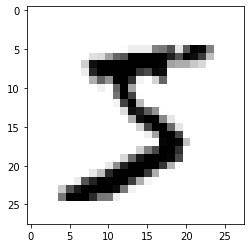

In [17]:
import matplotlib.pyplot as plt

dig = X[0]
dig_image = dig.reshape(28,28)

plt.imshow(dig_image, cmap = "binary")

Check the label of the above image

Turn label to number

In [18]:
y = y.astype(int)

Now, let's show the 100 first image in our data!!

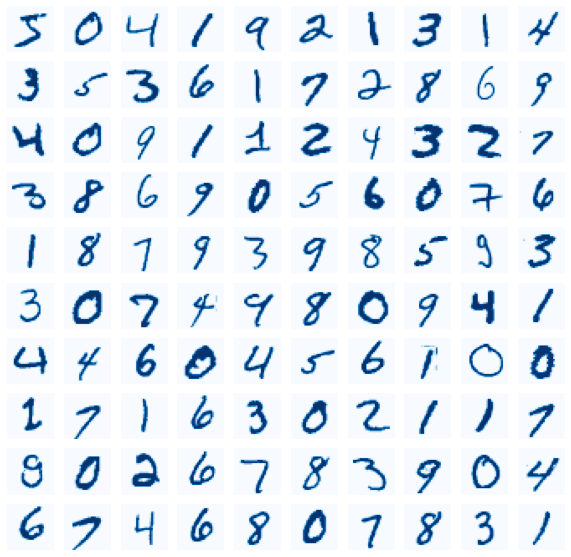

In [19]:
num = 10
fig = plt.figure(figsize=(10,10))
for i in range(0,num):
  for ii in range(0,num):
    index = i*num+ii;
    ax = fig.add_subplot(num,num,index+1)
    ax.imshow(X[index].reshape(28,28), cmap="Blues")
    ax.axis("off")



**Split data to train and test set**

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [22]:
X_train.shape,X_test.shape

((56000, 784), (14000, 784))

# Binary Classifier



##SGDClassifier

Now we simplify the problem by try to identify one digit, for examplex with 8.

Create the target for identify digis 8

In [23]:
y_train_8 = (y_train == 8)
y_test_8 = (y_test == 8)

Pick the Stochastic Gradient Descent (SGD) classifier model.

In [24]:
from sklearn.linear_model import SGDClassifier

In [25]:
sgd_clf = SGDClassifier(random_state=99)
sgd_clf.fit(X_train, y_train_8)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=99, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Evaluate model by `cross_val_score` from scikit-learn

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
cross_val_score(sgd_clf, X_train, y_train_8, cv=3, scoring="accuracy")

array([0.92821557, 0.86709166, 0.94026572])

**Precision and Recall**

In [28]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_predict

In [29]:
y_train_pred =  cross_val_predict(sgd_clf, X_train, y_train_8, cv=3)

In [30]:
y_score = cross_val_predict(sgd_clf, X_train, y_train_8, cv=3, method="decision_function")

Get the precision and recall value

In [31]:
precision_score(y_train_8, y_train_pred)

0.5315110098709187

In [32]:
recall_score(y_train_8, y_train_pred)

0.7729112992270887

Using `precision_recall_curve()` function to compure precision an recall for all possible thresholds

In [33]:
from sklearn.metrics import precision_recall_curve

Plot precision and recall as functiolns of the threshold value

In [34]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
  plt.plot(thresholds, recalls[:-1], "g-", label="Recall")


Text(0.5, 0, 'Thresholds')

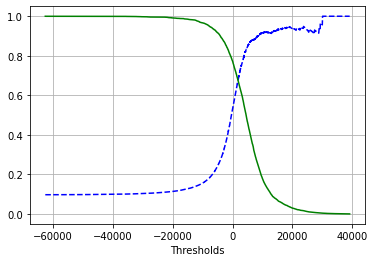

In [35]:
precisions, recalls, thresholds = precision_recall_curve(y_train_8, y_score)
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.grid(True)
plt.xlabel("Thresholds")

**The ROC curve**

ROC(Receiver operating characteristic) curve plot the true positive rate a gainst the false positive rate.

Using `roc_curve`

In [36]:
from sklearn.metrics import roc_curve

FPR(False Positive Rate) is the ratio of negative instances that are incorrectly classified as positive.

TPR(True Positive Rate)  = Recall

Plot the ROC

In [37]:
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1],[0,1], 'k--')

Text(0, 0.5, 'True Positive Rate (Recall)')

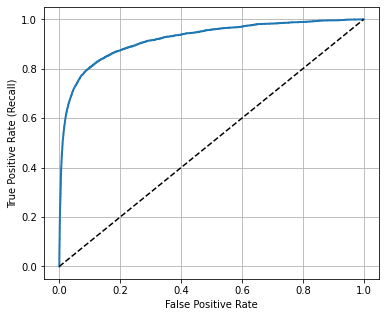

In [38]:
fpr, tpr, thresholds = roc_curve(y_train_8, y_score)
fig = plt.figure(figsize=(6,5))
plot_roc_curve(fpr, tpr)
plt.grid(True)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")

**Area Under the Curve (AUC)**

In [39]:
from sklearn.metrics import roc_auc_score

In [40]:
roc_auc_score(y_train_8, y_score)

0.921139680778985

## RandomForestClassifier 

Let's train a RandomForest and compare its ROC curve and ROC AUC score the SGDClassifier.

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
forest_clf = RandomForestClassifier(random_state=99)
y_probas_fores = cross_val_predict(forest_clf, X_train, y_train_8, cv=3, method="predict_proba")

convert probaility to score

In [43]:
y_scores_forest = y_probas_fores[:,1] # probability of positive class

calculate the FPR and TPR tp plot ROC

In [44]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_8,y_scores_forest)

Let's compare 2 ROC curve

Text(0.5, 1.0, 'Comparing ROC curve')

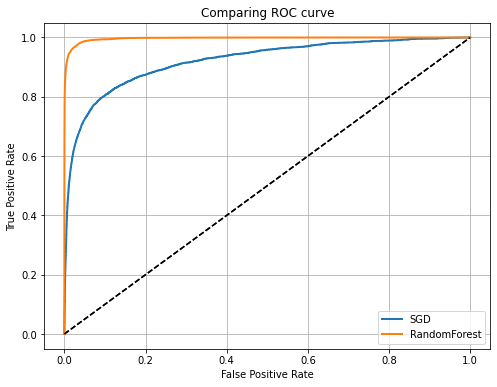

In [45]:
plt.figure(figsize=(8,6))
plot_roc_curve(fpr, tpr, "SGD")
plot_roc_curve(fpr_forest, tpr_forest, "RandomForest")
plt.legend(loc="lower right")
plt.grid(True)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Comparing ROC curve")

In [46]:
roc_auc_score(y_train_8, y_scores_forest)

0.9967186392983214

# Multiclass Classification

**Multiclass classification with SGDClasifier**

The `SGDClassifier` automaticcaly run OvA (One versus All) algorithm when we put the multiclass input. Les't try 

In [47]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=99, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Make prediction and see the immage 

In [48]:
sgd_clf.predict([X_test[0]])

array([4])

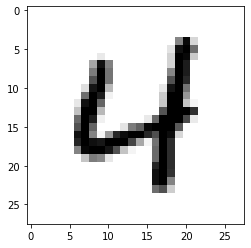

In [49]:
plt.imshow(X_test[0].reshape(28,28), cmap = "binary")

using `decision_function()` to return all score of each class

In [50]:
a_score = sgd_clf.decision_function([X_test[0]])
a_score

array([[-23769.09237473, -40048.30776136,  -5031.0072976 ,
        -13446.19037111,   9470.38678276, -13098.42774395,
        -14344.59257321, -19507.40109924,  -3286.84088415,
        -13854.54885484]])

In [51]:
np.argmax(a_score)

4

In [52]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

The highest score in `a_score` corresponding to class 4, while class with index 4 is class 4

**Multiclass classification with RandomForest**

In [53]:
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=99, verbose=0,
                       warm_start=False)

Make a predition

In [54]:
forest_clf.predict([X_test[9]])

array([2])

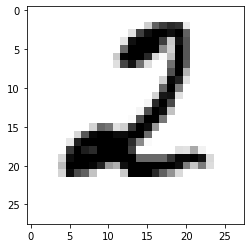

In [55]:
plt.imshow(X_test[9].reshape(28,28), cmap = "binary")

!! `RandomForest` directly classify instances into multiple classes.

Using `predict_proba()` to get the list of probabilities that the classifier assigned to each instance for each class.

In [56]:
forest_clf.predict_proba([X_test[9]])

array([[0.  , 0.  , 0.96, 0.01, 0.  , 0.01, 0.01, 0.  , 0.01, 0.  ]])

Evaluate model with `cross_val_score()`

In [57]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.88444849, 0.88235924, 0.87029894])

In [58]:
cross_val_score(forest_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.96566133, 0.96442921, 0.96303439])

Score is over 87% for SGDClassifier and over 96% for RandomForest Classifier.

This is not such a bad score

**Scaling Input**

Now I try to scaling the input with `StandardScaler` to increase accuracy

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
sgd_clf = SGDClassifier(random_state=99, max_iter=2000)

In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
sgd_score = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
forest_score = cross_val_score(forest_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
print("SGDClassifier: ")
print(sgd_score)
print("RandomForest Classifier: ")
print(forest_score)

SGDClassifier: 
[0.90818021 0.90266245 0.90185364]
RandomForest Classifier: 
[0.96560776 0.96475063 0.96308797]


# Error Analysis

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
y_train_preds = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [64]:
conf_mx = confusion_matrix(y_train, y_train_preds)
conf_mx

array([[5178,    0,   16,    8,    6,   34,   38,    5,  178,    2],
       [   0, 6091,   39,   15,    4,   41,    6,    8,  153,   17],
       [  21,   18, 4944,   81,   73,   22,   66,   46,  304,    8],
       [  24,   15,  120, 4927,    0,  186,   19,   39,  293,   66],
       [  11,   11,   40,   11, 4882,    7,   36,   24,  255,  159],
       [  27,   17,   23,  166,   44, 4191,   73,   20,  414,   70],
       [  28,   24,   45,    3,   38,   86, 5198,    9,  112,    0],
       [  20,   16,   65,   21,   40,    9,    7, 5338,  124,  209],
       [  17,   54,   42,   89,    5,  114,   31,   12, 5028,   42],
       [  21,   29,   26,   55,  132,   30,    1,  162,  266, 4860]])

Visualize the confusion matrix

In [65]:
import seaborn as sns

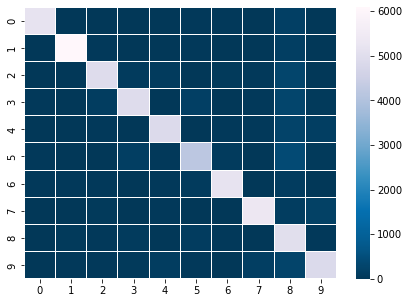

In [66]:
plt.figure(figsize=(7,5))
sns.heatmap(conf_mx, cmap="PuBu_r",linewidths=.05)

Now I want to compare error rates instead of the absolute number -> devide each row for the row-total

In [67]:
row_sums = conf_mx.sum(axis=1, keepdims=True)  # Get the total number of row (predict)
norm_conf_mx = conf_mx/row_sums

Now I want to focus only on the error, therefore I will remove the matrix diagonal

In [69]:
np.fill_diagonal(norm_conf_mx,0)

Let's see the error

Text(0.5, 24.0, 'Predicted label')

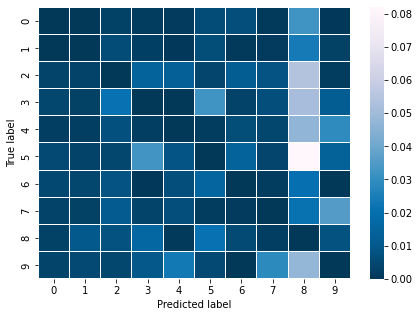

In [74]:
plt.figure(figsize=(7,5))
fig = sns.heatmap(norm_conf_mx, cmap="PuBu_r",linewidths=.05)
fig.set_ylabel("True label")
fig.set_xlabel("Predicted label")

* 3 and 5 often get confused
* Many image has wrong classified as 8, but it not. Especially, many 5 predicts as 8


Let visualize the error of 3 and 5, why our model failed to predict?

In [81]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_preds == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_preds == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_preds == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_preds == cl_b)]


In [84]:
# Define a function to plot our image
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap ="binary", **options)
    plt.axis("off")

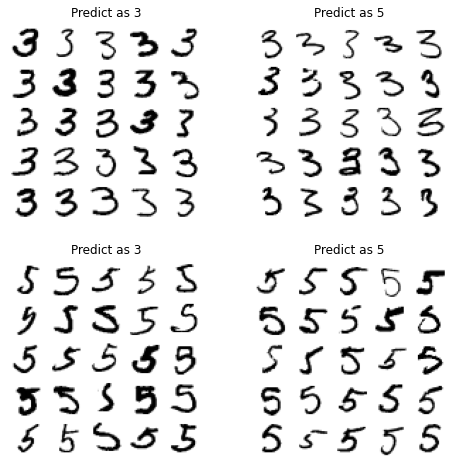

In [94]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.title("Predict as 3")
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.title("Predict as 5")
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.title("Predict as 3")
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.title("Predict as 5")
plt.show()


There are some imaged is badly written that even a human cannot clearly classify.

For example,

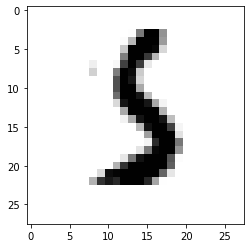

In [100]:
plt.imshow(X_ba[17].reshape(28,28), cmap = "binary");

This is a not a bad result for the linear model.